In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('combined_data_ENGHIN.csv')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

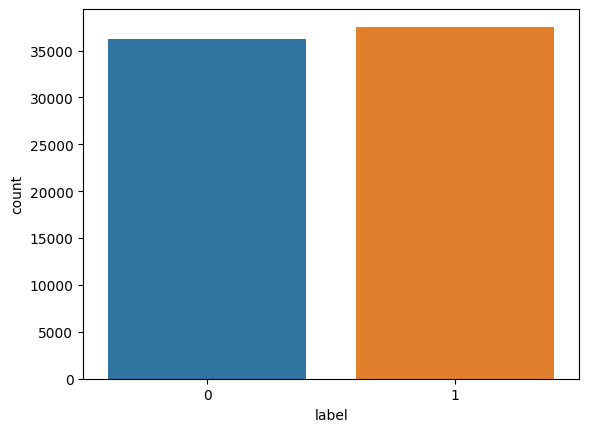

In [8]:
sns.countplot(data = df, x = 'label')

In [9]:
df.count()

text     73775
label    73814
dtype: int64

In [10]:
df[df['label'] == 0].count()

text     36269
label    36269
dtype: int64

In [11]:
df[df['label'] == 1].count()

text     37506
label    37545
dtype: int64

In [12]:
df.dropna(inplace = True)

In [13]:
df['text'].fillna('', inplace=True)

In [14]:
df.count()

text     73775
label    73775
dtype: int64

In [15]:
import re
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        text = ' '.join(text.split())
        return text
    else:
        return ''

In [12]:
"""import re
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
def clean_text(x):
    text = re.sub(r'\W', ' ', x)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)    
    text = text.lower()
    text = text.split()
    text = [stemmer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text"""

"import re\nfrom nltk.stem import WordNetLemmatizer\nstemmer = WordNetLemmatizer()\ndef clean_text(x):\n    text = re.sub(r'\\W', ' ', x)\n    text = re.sub(r'\\s+[a-zA-Z]\\s+', ' ', text)\n    text = re.sub(r'^[a-zA-Z]\\s+', ' ', text)\n    text = re.sub(r'\\s+', ' ', text)    \n    text = text.lower()\n    text = text.split()\n    text = [stemmer.lemmatize(word) for word in text]\n    text = ' '.join(text)\n    return text"

In [16]:
df['text'] = df['text'].apply(lambda x: clean_text(x))

In [17]:
x = df['text']
y = df['label']

In [18]:
x[0]

'no comment is expected from barack obama members of the fyf911 or fukyoflag and blacklivesmatter movements called for the lynching and hanging of white people and cops they encouraged others on a radio show tuesday night to turn the tide and kill white people and cops to send a message about the killing of black people in americaone of the fyoflag organizers is called sunshine she has a radio blog show hosted from texas called sunshine s fing opinion radio show a snapshot of her fyf911 lolatwhitefear twitter page at 953 pm shows that she was urging supporters to call now fyf911 tonight we continue to dismantle the illusion of white below is a snapshot twitter radio call invite fyf911the radio show aired at 1000 pm eastern standard timeduring the show callers clearly call for lynching and killing of white peoplea 239 minute clip from the radio show can be heard here it was provided to breitbart texas by someone who would like to be referred to as hannibal he has already received death 

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 101)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_x_train = cv.fit_transform(x_train)
cv_x_test = cv.transform(x_test)

In [15]:
"""from sklearn.feature_extraction.text import TfidfVectorizer
converter = TfidfVectorizer() 
cv_x_train = converter.fit_transform(x_train)
cv_x_test = converter.transform(x_test)"""

'from sklearn.feature_extraction.text import TfidfVectorizer\nconverter = TfidfVectorizer() \ncv_x_train = converter.fit_transform(x_train)\ncv_x_test = converter.transform(x_test)'

In [21]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [22]:
mnb.fit(cv_x_train, y_train)

MultinomialNB()

In [23]:
y_pred_nb = mnb.predict(cv_x_test)

In [24]:
y_pred_nb

array([0, 0, 0, ..., 1, 1, 1])

In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [26]:
accuracy_nb

0.9071162317858353

Random Forest classifier

In [ ]:
import numpy as np
alpha_values = np.linspace(0.1, 2.0, 20)

In [27]:
accuracy_values = []

for alpha in alpha_values:
    clf = MultinomialNB(alpha=alpha)
    clf.fit(cv_x_train, y_train)
    y_pred = clf.predict(cv_x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

In [30]:
accuracy_values

[0.9202643171806167,
 0.9174178244662826,
 0.9150796340223653,
 0.9135886140291427,
 0.9120975940359201,
 0.9109454422229752,
 0.9096916299559471,
 0.9087427990511691,
 0.9078278549644189,
 0.9071162317858353,
 0.9065401558793629,
 0.9057607590647239,
 0.9051846831582514,
 0.9047102677058624,
 0.9038969840731955,
 0.9034903422568621,
 0.9028803795323619,
 0.9024398508980007,
 0.9018637749915283,
 0.9014571331751948]

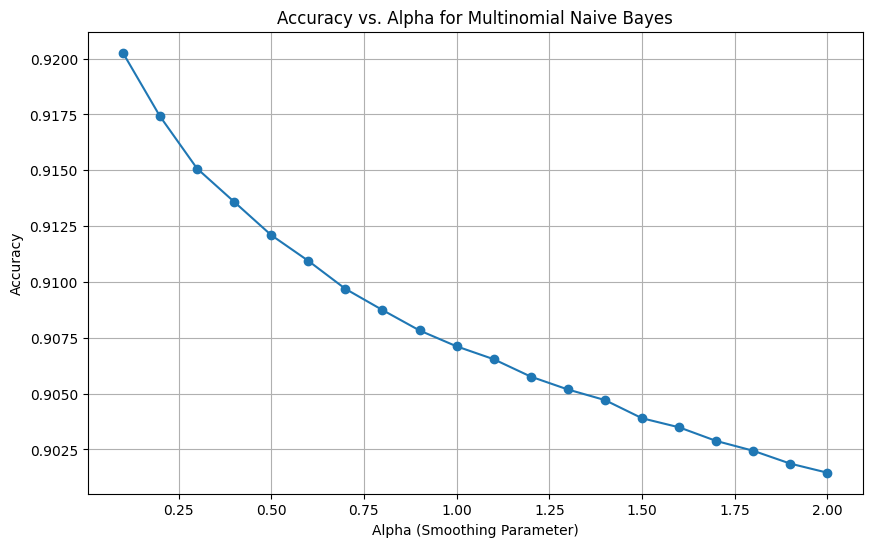

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Alpha for Multinomial Naive Bayes')
plt.xlabel('Alpha (Smoothing Parameter)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, random_state = 0)
classifier.fit(cv_x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [32]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [33]:
rf_pred = classifier.predict(cv_x_test)
accuaracy_rf = accuracy_score(y_test, rf_pred)
accuaracy_rf

0.9399525584547611

In [34]:
n_estimators_values = [10, 50, 100, 150, 200, 300, 500]  # Vary the number of trees


In [35]:
accuracy_values = []

for n_estimators in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    clf.fit(cv_x_train, y_train)
    y_pred = clf.predict(cv_x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)


In [37]:
accuracy_values

[0.8936970518468316,
 0.9290071162317859,
 0.9341240257539817,
 0.9364283293798712,
 0.9376143680108437,
 0.939173161640122,
 0.9399525584547611]

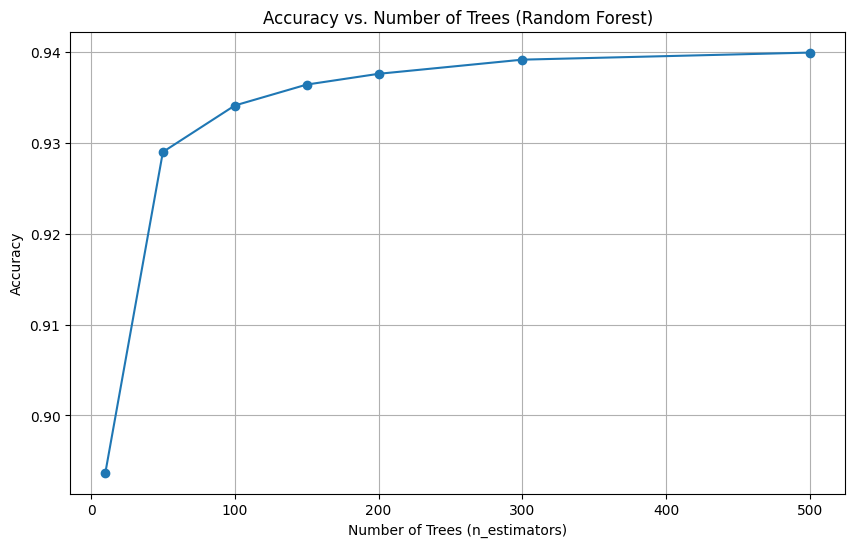

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Trees (Random Forest)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [39]:
y_prob = classifier.predict_proba(cv_x_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # Compute ROC curve
roc_auc = auc(fpr, tpr)  # Compute AUC (Area Under the Curve)

# Calculate AUC using the roc_auc_score function
auc_score = roc_auc_score(y_test, y_prob)


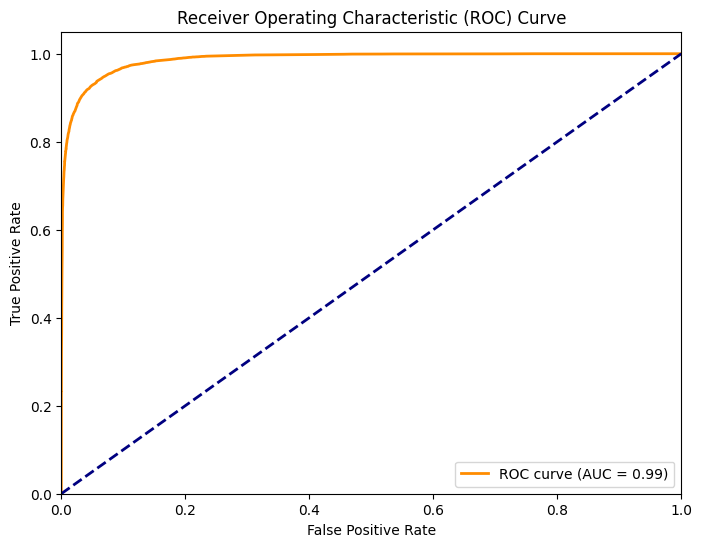

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [23]:
report = classification_report(y_test, y_pred_nb)
report

'              precision    recall  f1-score   support\n\n           0       0.88      0.94      0.91     14578\n           1       0.94      0.88      0.91     14932\n\n    accuracy                           0.91     29510\n   macro avg       0.91      0.91      0.91     29510\nweighted avg       0.91      0.91      0.91     29510\n'

In [24]:
from lime.lime_text import LimeTextExplainer

In [25]:
pd.set_option('display.max_columns', None)

# Set the maximum column width to show the entire content of each cell
pd.set_option('display.max_colwidth', None)

In [26]:
df[df['label'] == 0]['text'].iloc[1:2]

11    brussels reuters british prime minister theresa may s offer of settled status for eu residents is flawed and will leave them with fewer rights after brexit the european parliament s brexit coordinator said on tuesday a family of five could face a bill of 360 pounds to acquire the new status guy verhofstadt told may s brexit secretary david davis in a letter seen by reuters a very significant amount for a family on low income listing three other concerns for the eu legislature which must approve any treaty on the march 2019 exit verhofstadt told davis under your proposals eu citizens will definitely notice a deterioration of their status as a result of brexit and the parliament s aim all along has been that eu citizens and uk citizens in the eu27 should notice no difference verhofstadt a former belgian prime minister wrote in response to davis who had written to him after parliament complained last week that there remained major issues to be settled on the rights of the 3 million 

In [27]:
def predict_proba(texts):
    X = cv.transform(texts)
    return mnb.predict_proba(X)

text_instance = ["BRUSSELS Reuters British Prime Minister Theresa May s offer of settled status for EU residents is flawed and will leave them with fewer rights after Brexit the European Parliament s Brexit coordinator said on Tuesday A family of five could face a bill of 360 pounds to acquire the new status Guy Verhofstadt told May s Brexit Secretary David Davis in a letter seen by Reuters a very significant amount for a family on low income Listing three other concerns for the EU legislature which must approve any treaty on the March 2019 exit Verhofstadt told Davis Under your proposals EU citizens will definitely notice a deterioration of their status as a result of Brexit And the Parliament s aim all along has been that EU citizens and UK citizens in the EU27 should notice no difference Verhofstadt a former Belgian prime minister wrote in response to Davis who had written to him after Parliament complained last week that there remained major issues to be settled on the rights of the 3 million EU citizens in Britain On Tuesday he told reporters that Parliament was determined that expatriates should not become victims of Brexit May had unveiled more details last week of a system aimed at giving people already in Britain a quick and cheap way of asserting their rights to stay there indefinitely The issue along with how much Britain owes and the new EUUK border across Ireland is one on which the EU wants an outline agreement before opening talks on the future of trade Verhofstadt said lawmakers were not dismissing British efforts to streamline applications but saw flaws in the nature of settled status itself As well as the cost which is similar to that of acquiring a British passport he cited three others Europeans should simply declare a whole household resident without needing an application process the burden of proof should be on the British authorities to deny them rights more stringent conditions on criminal records could mean some EU residents including some now with permanent resident status being deported for failing to gain settled status EU residents would lose some rights to bring relatives to Britain as the new status would give them the same rights as British people who now have fewer rights than EU citizens"]

explainer = LimeTextExplainer(class_names = ["Fake", "Real"])

explanation = explainer.explain_instance(text_instance[0], predict_proba, num_samples=1000)

In [28]:
explanation.show_in_notebook()

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


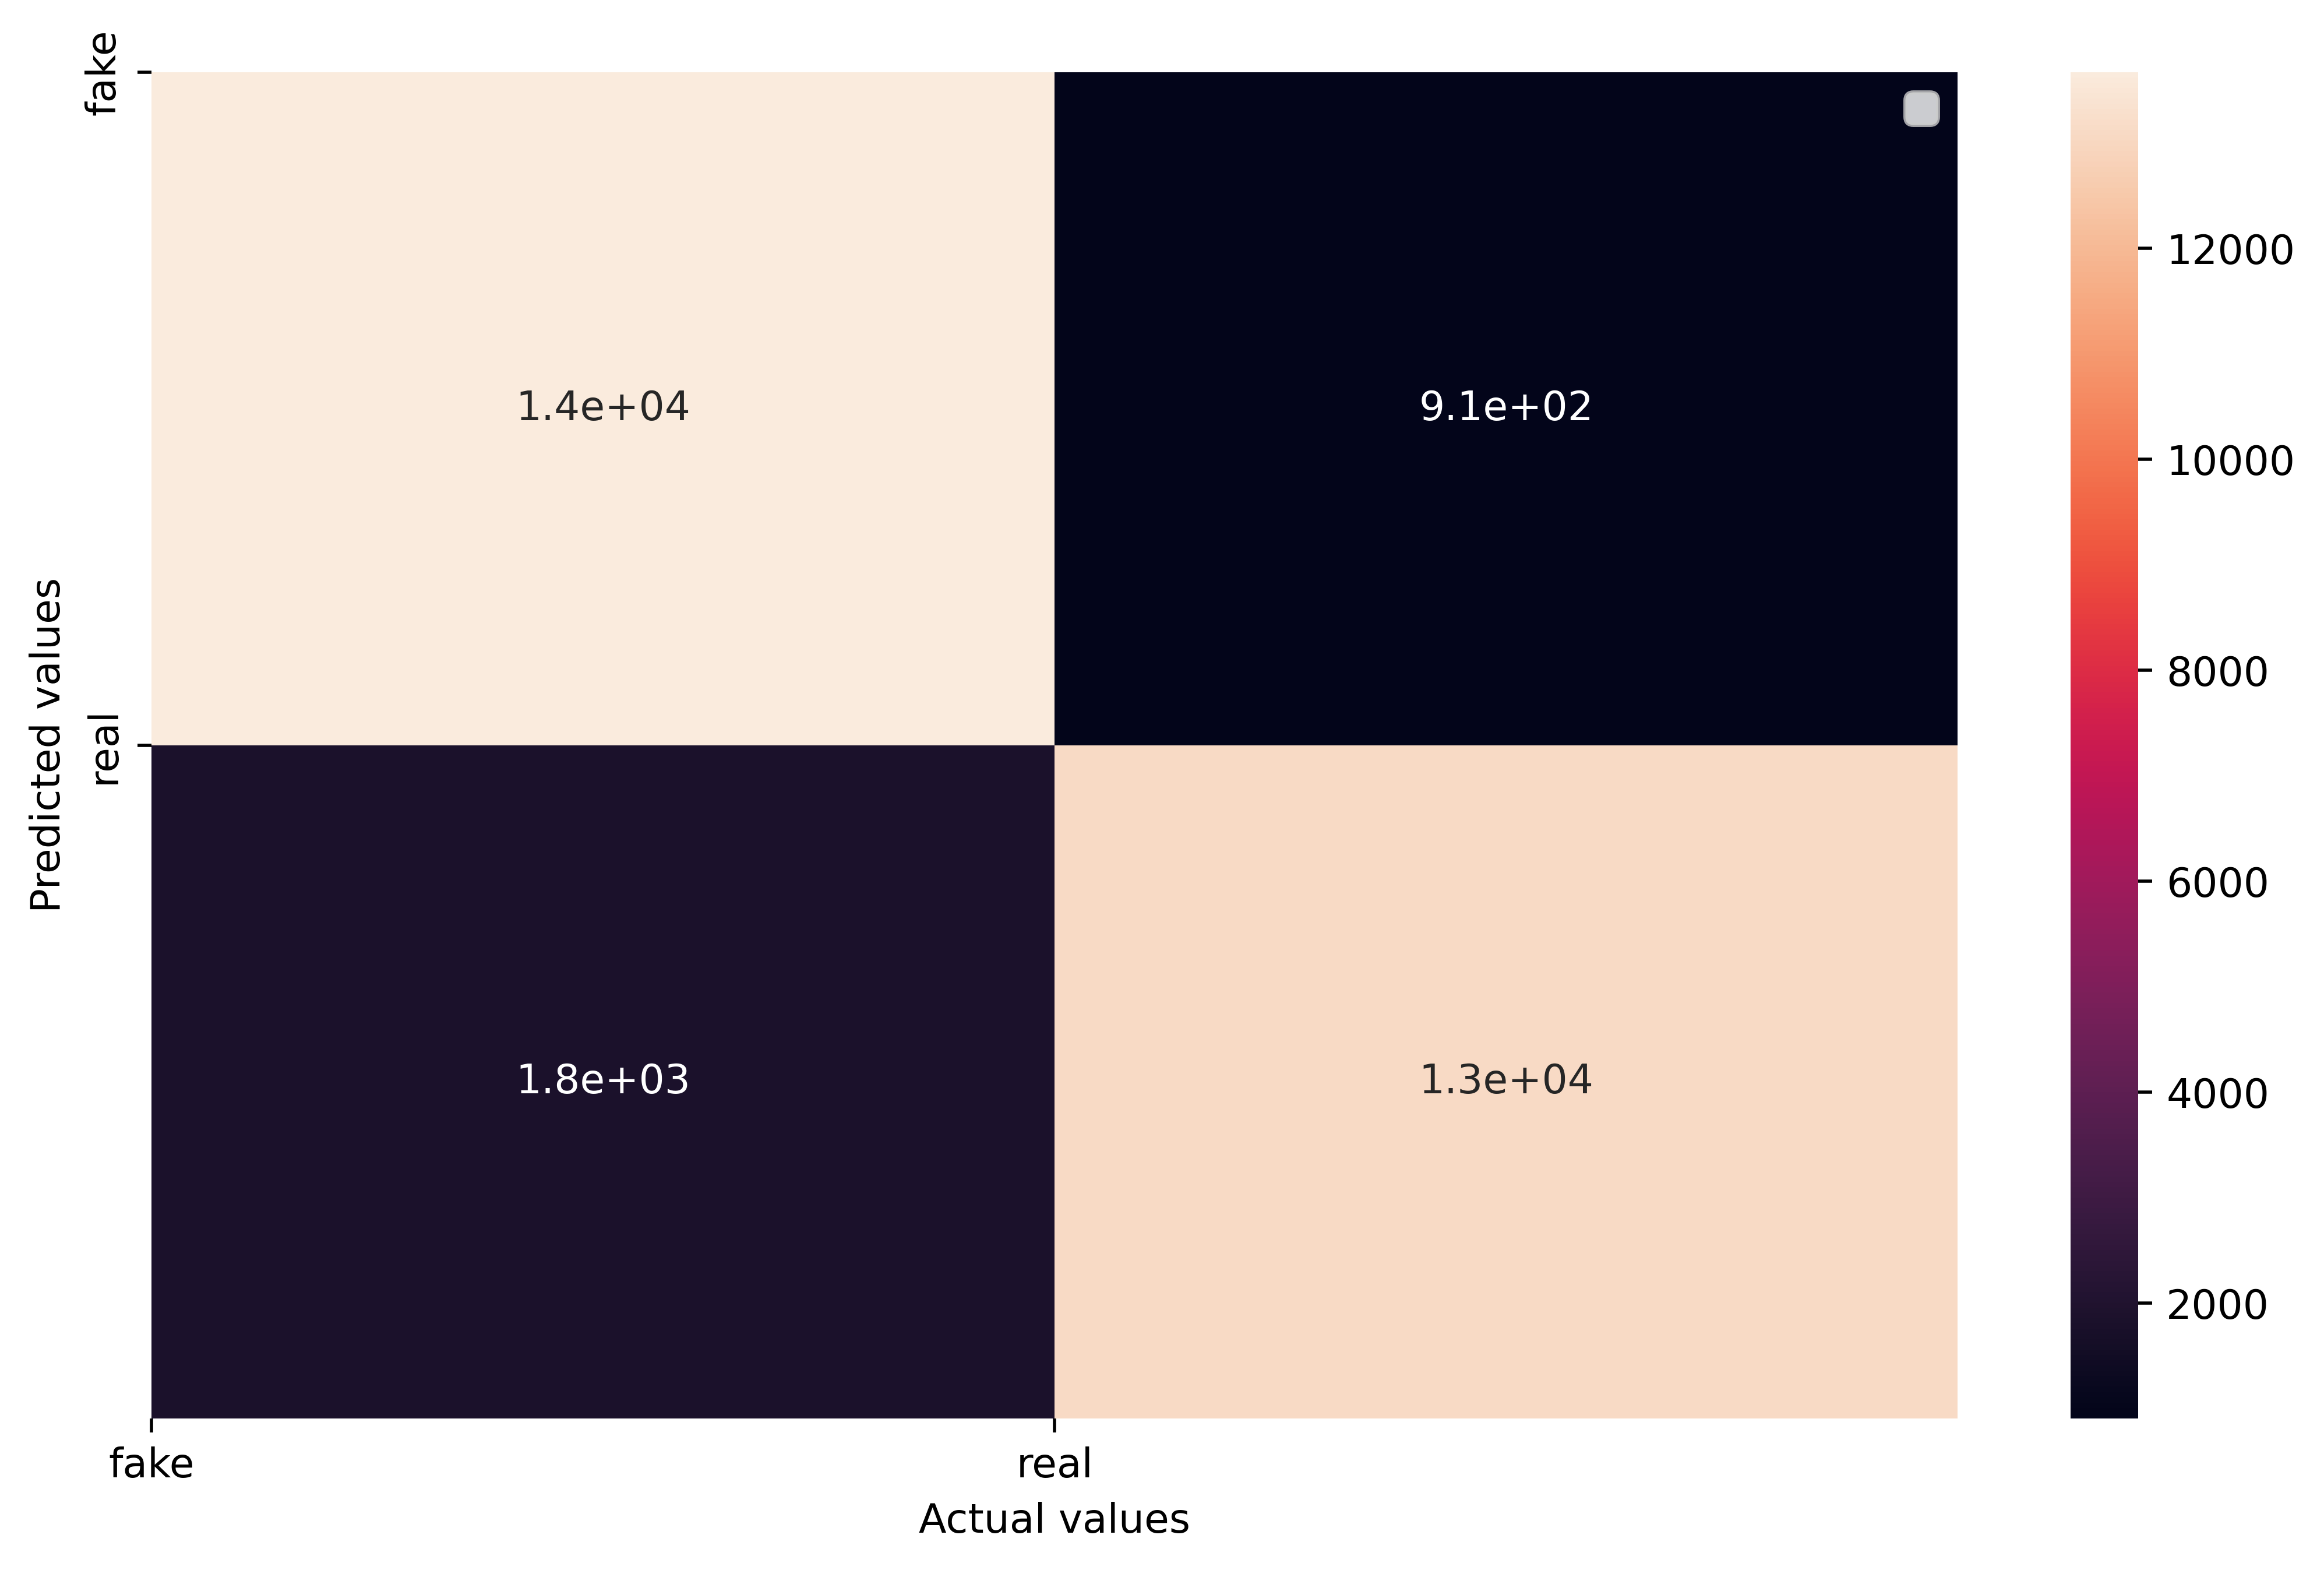

In [30]:
class_names = ['fake', 'real']
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm, annot = True)
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9351752695081031
Recall: 0.8772435038842754
F1 Score: 0.905283527419745


In [33]:
y_scores = mnb.predict_proba(cv_x_test)[:, 1]

In [34]:
y_scores

array([2.53201902e-31, 6.02336717e-25, 6.39236512e-13, ...,
       1.00000000e+00, 1.00000000e+00, 9.99999874e-01])

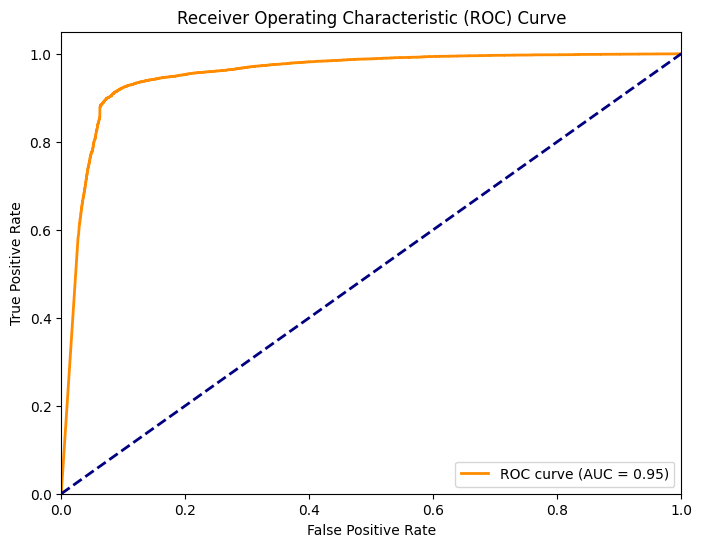

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion matrix for Random Forest

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


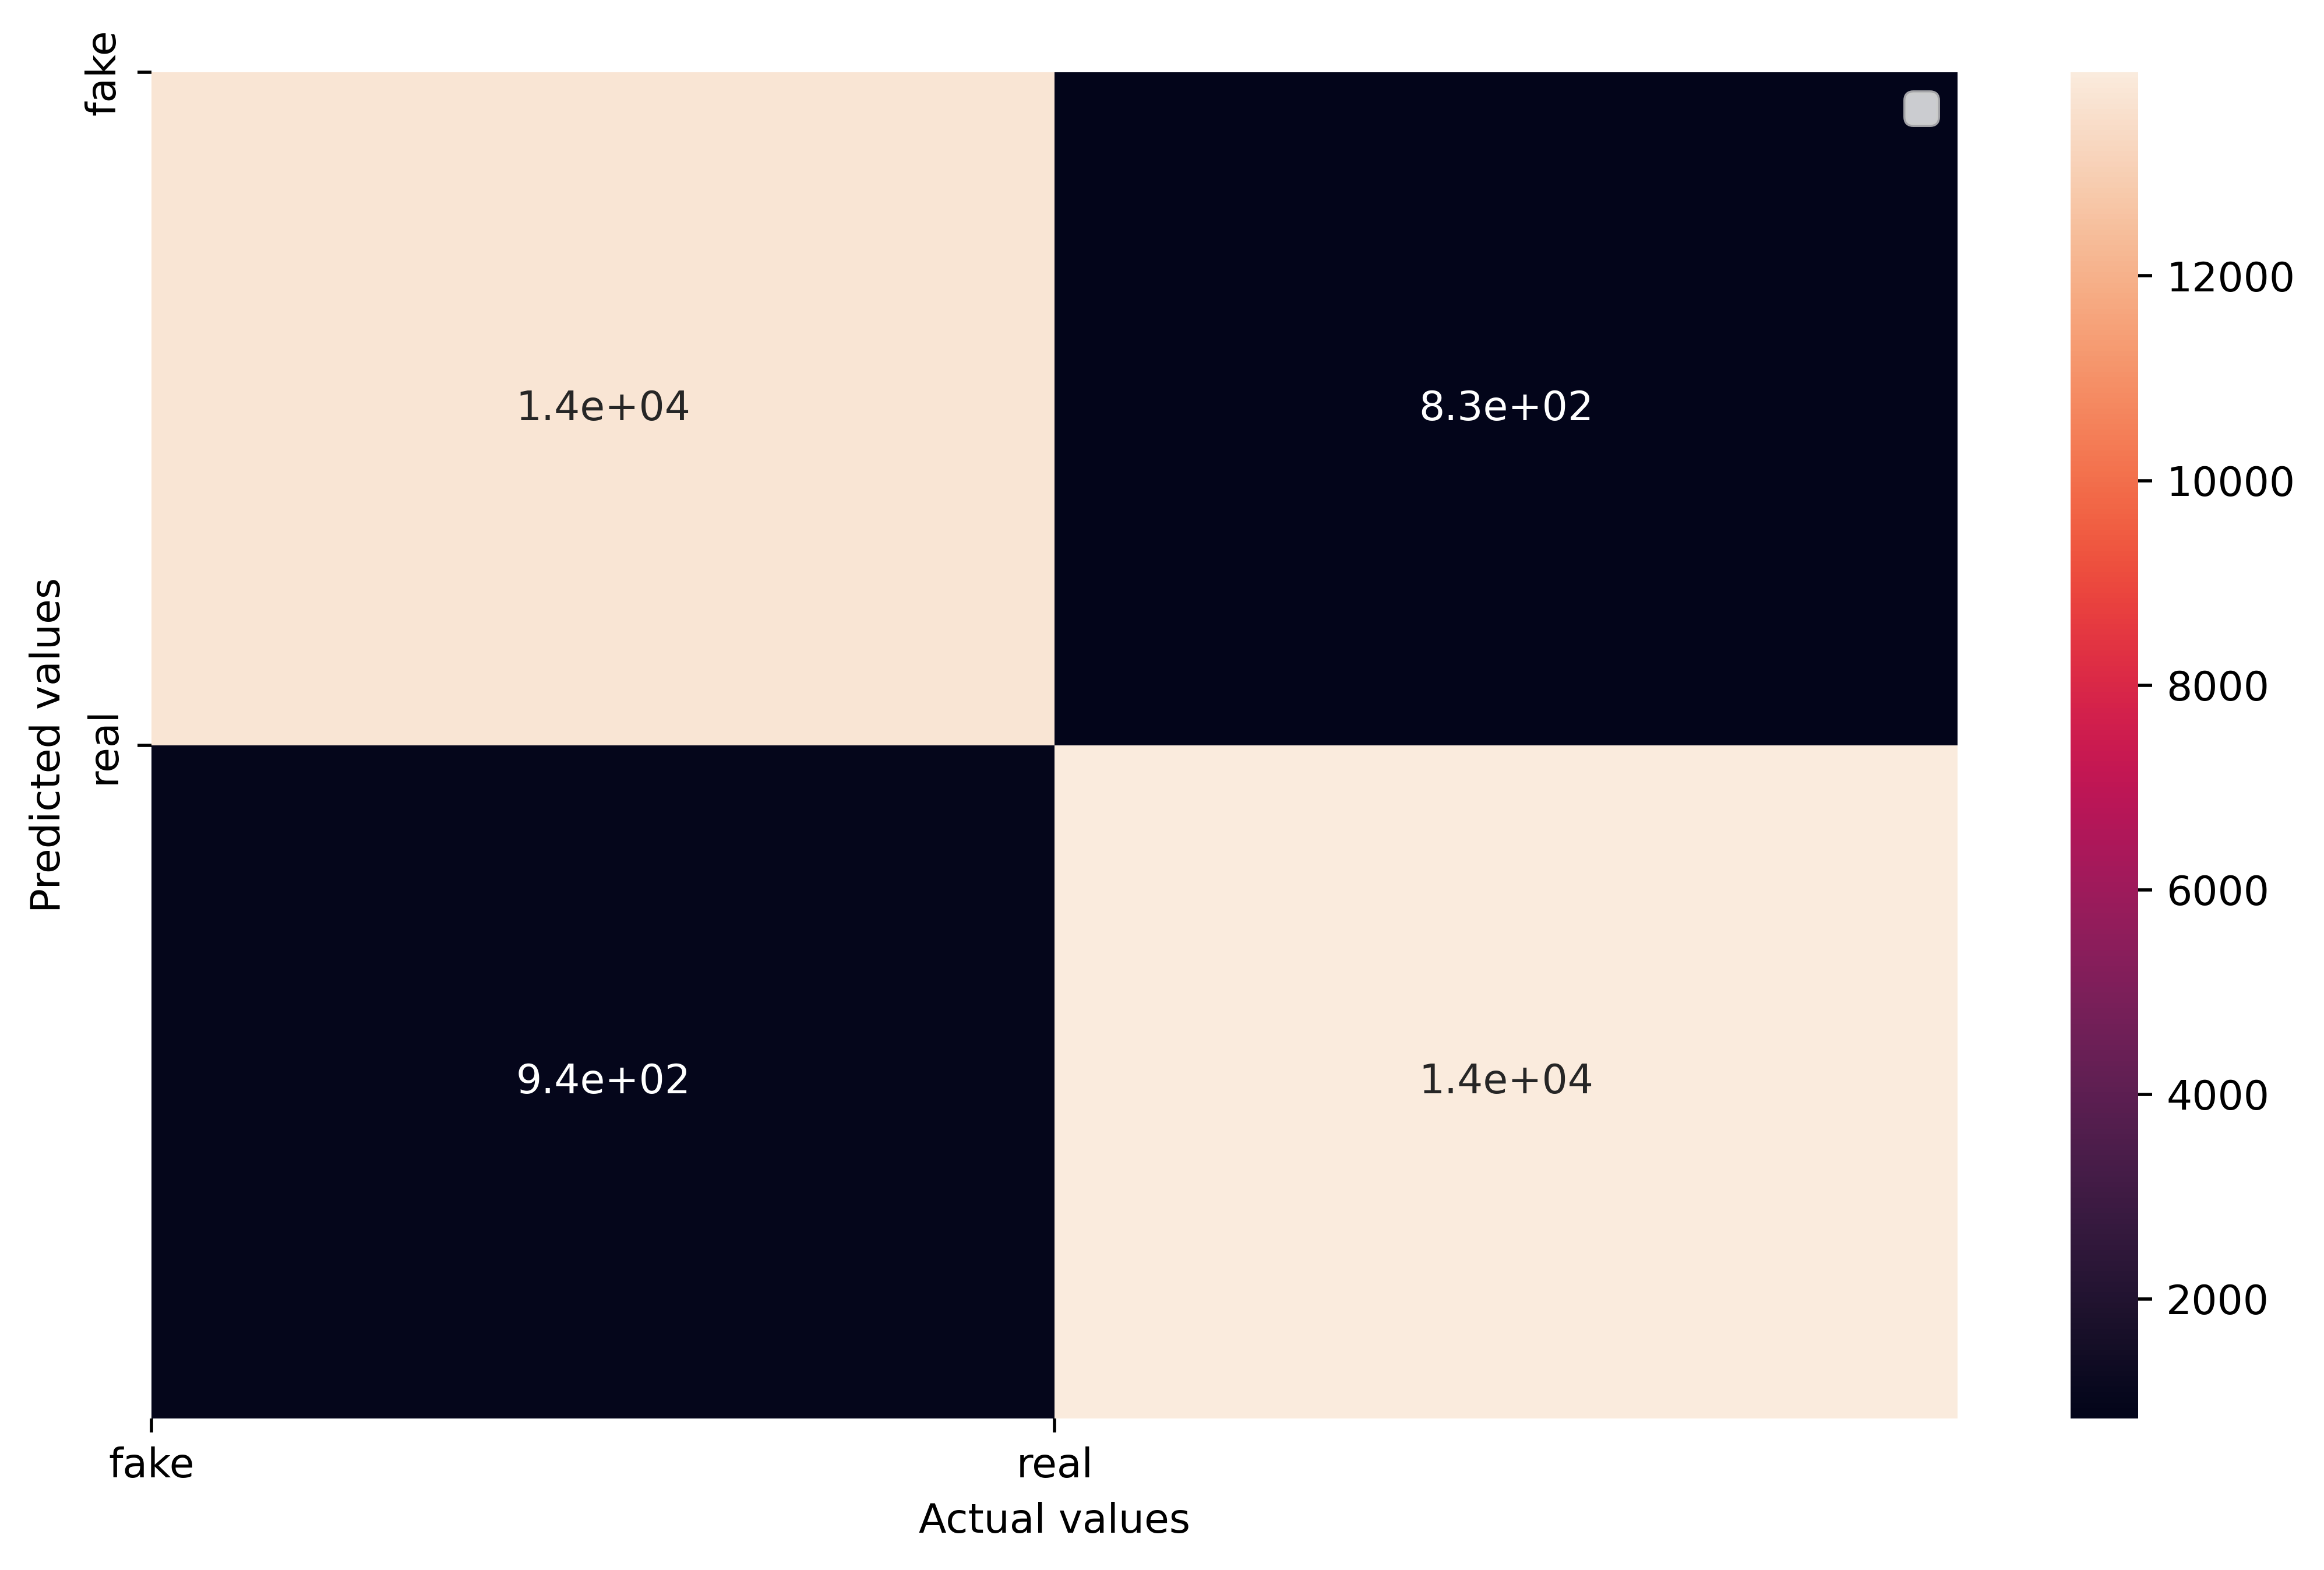

In [36]:
cm_rf = confusion_matrix(y_test, rf_pred)
class_names = ['fake', 'real']
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm_rf, annot = True)
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

In [37]:
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9438149197355996
Recall: 0.9371149209750871
F1 Score: 0.940452987431951


In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [42]:
tokenizer =Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(x_train)

In [43]:
x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen = 1000)

In [44]:
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen = 1000)

In [45]:
len(x_train)

44265

In [46]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

In [47]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=1000),
    Bidirectional(LSTM(200, return_sequences=True)),
    Bidirectional(LSTM(100)),
    Dropout(0.5), 
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

2023-10-06 12:43:43.941689: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-06 12:43:43.941718: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-06 12:43:43.941729: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-06 12:43:43.941948: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-06 12:43:43.942238: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [48]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         1000000   
                                                                 
 bidirectional (Bidirection  (None, 1000, 400)         481600    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               400800    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [51]:
history = model.fit(x_train, y_train, batch_size = 50, epochs = 3, validation_data = (x_test, y_test))

Epoch 1/3
886/886 [==============================] - 1209s 1s/step - loss: 0.3037 - accuracy: 0.8789 - val_loss: 0.2355 - val_accuracy: 0.9125
Epoch 2/3
886/886 [==============================] - 1233s 1s/step - loss: 0.2239 - accuracy: 0.9139 - val_loss: 0.2872 - val_accuracy: 0.8775
Epoch 3/3
886/886 [==============================] - 1388s 2s/step - loss: 0.1977 - accuracy: 0.9237 - val_loss: 0.2006 - val_accuracy: 0.9251


In [52]:
import pickle

with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [53]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)


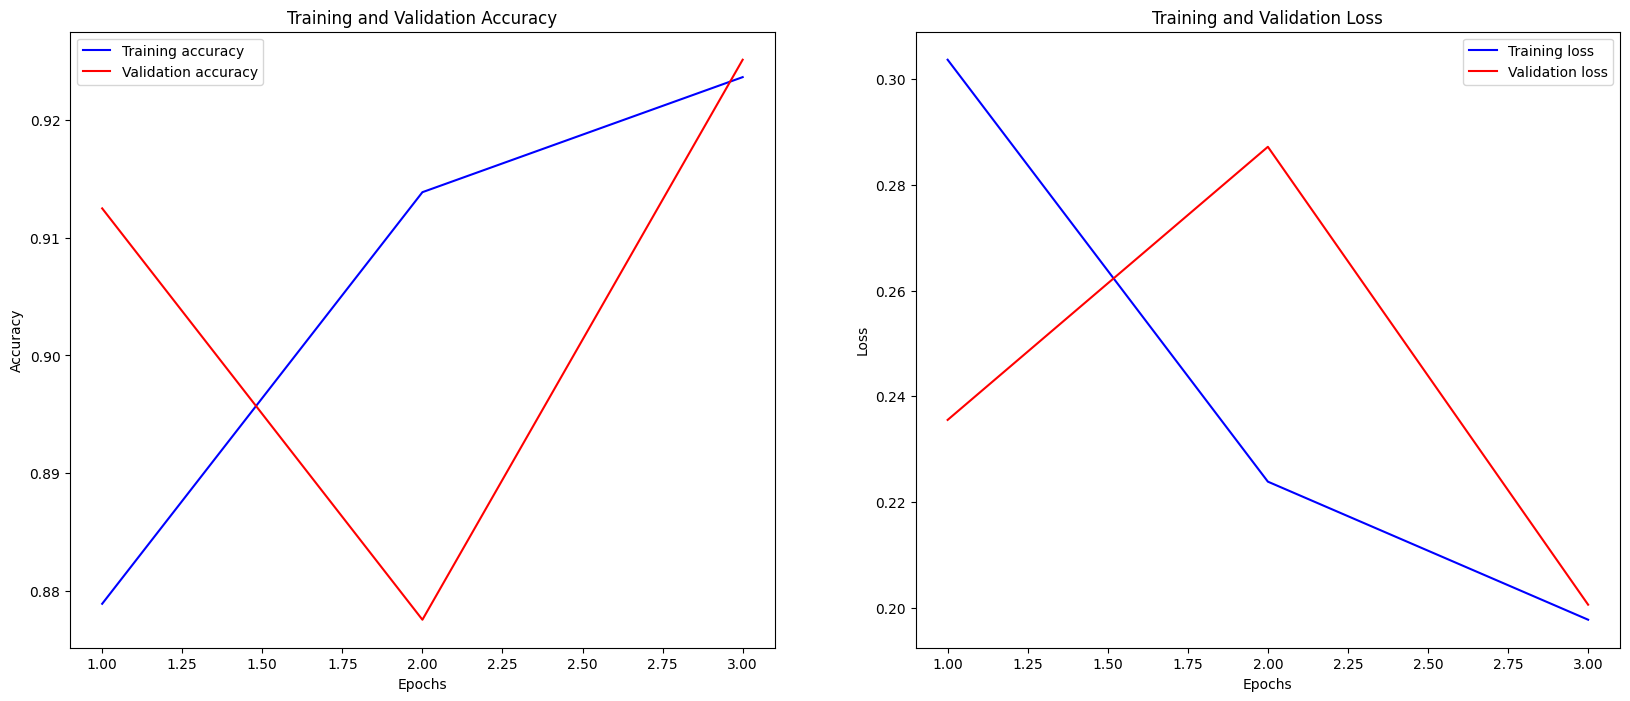

In [57]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [58]:
y_prob = model.predict(x_test)

923/923 [==============================] - 147s 153ms/step


In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [60]:
roc_auc = roc_auc_score(y_test, y_prob)

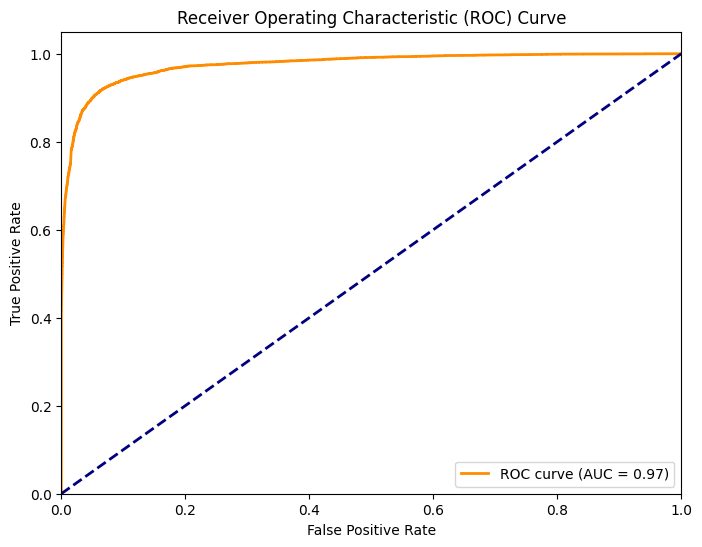

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
"""from keras.models import save_model

model.save('my_lstmFake_model_intern.h5')"""

/Users/rishavghosh/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Combining results of two models


In [20]:
from keras.models import load_model

loaded_model = load_model('my_lstmFake_model_intern.h5')

In [21]:
lstm_predictions = loaded_model.predict(x_test)

923/923 [==============================] - 502s 544ms/step


In [22]:
threshold = 0.5
lstm_binary_predictions = (lstm_predictions >= threshold).astype(int)

In [52]:
accuracy = accuracy_score(y_test, lstm_binary_predictions)

In [53]:
accuracy

0.9486953575059301

In [25]:
from sklearn.metrics import confusion_matrix
cm_dl = confusion_matrix(y_test, lstm_binary_predictions)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


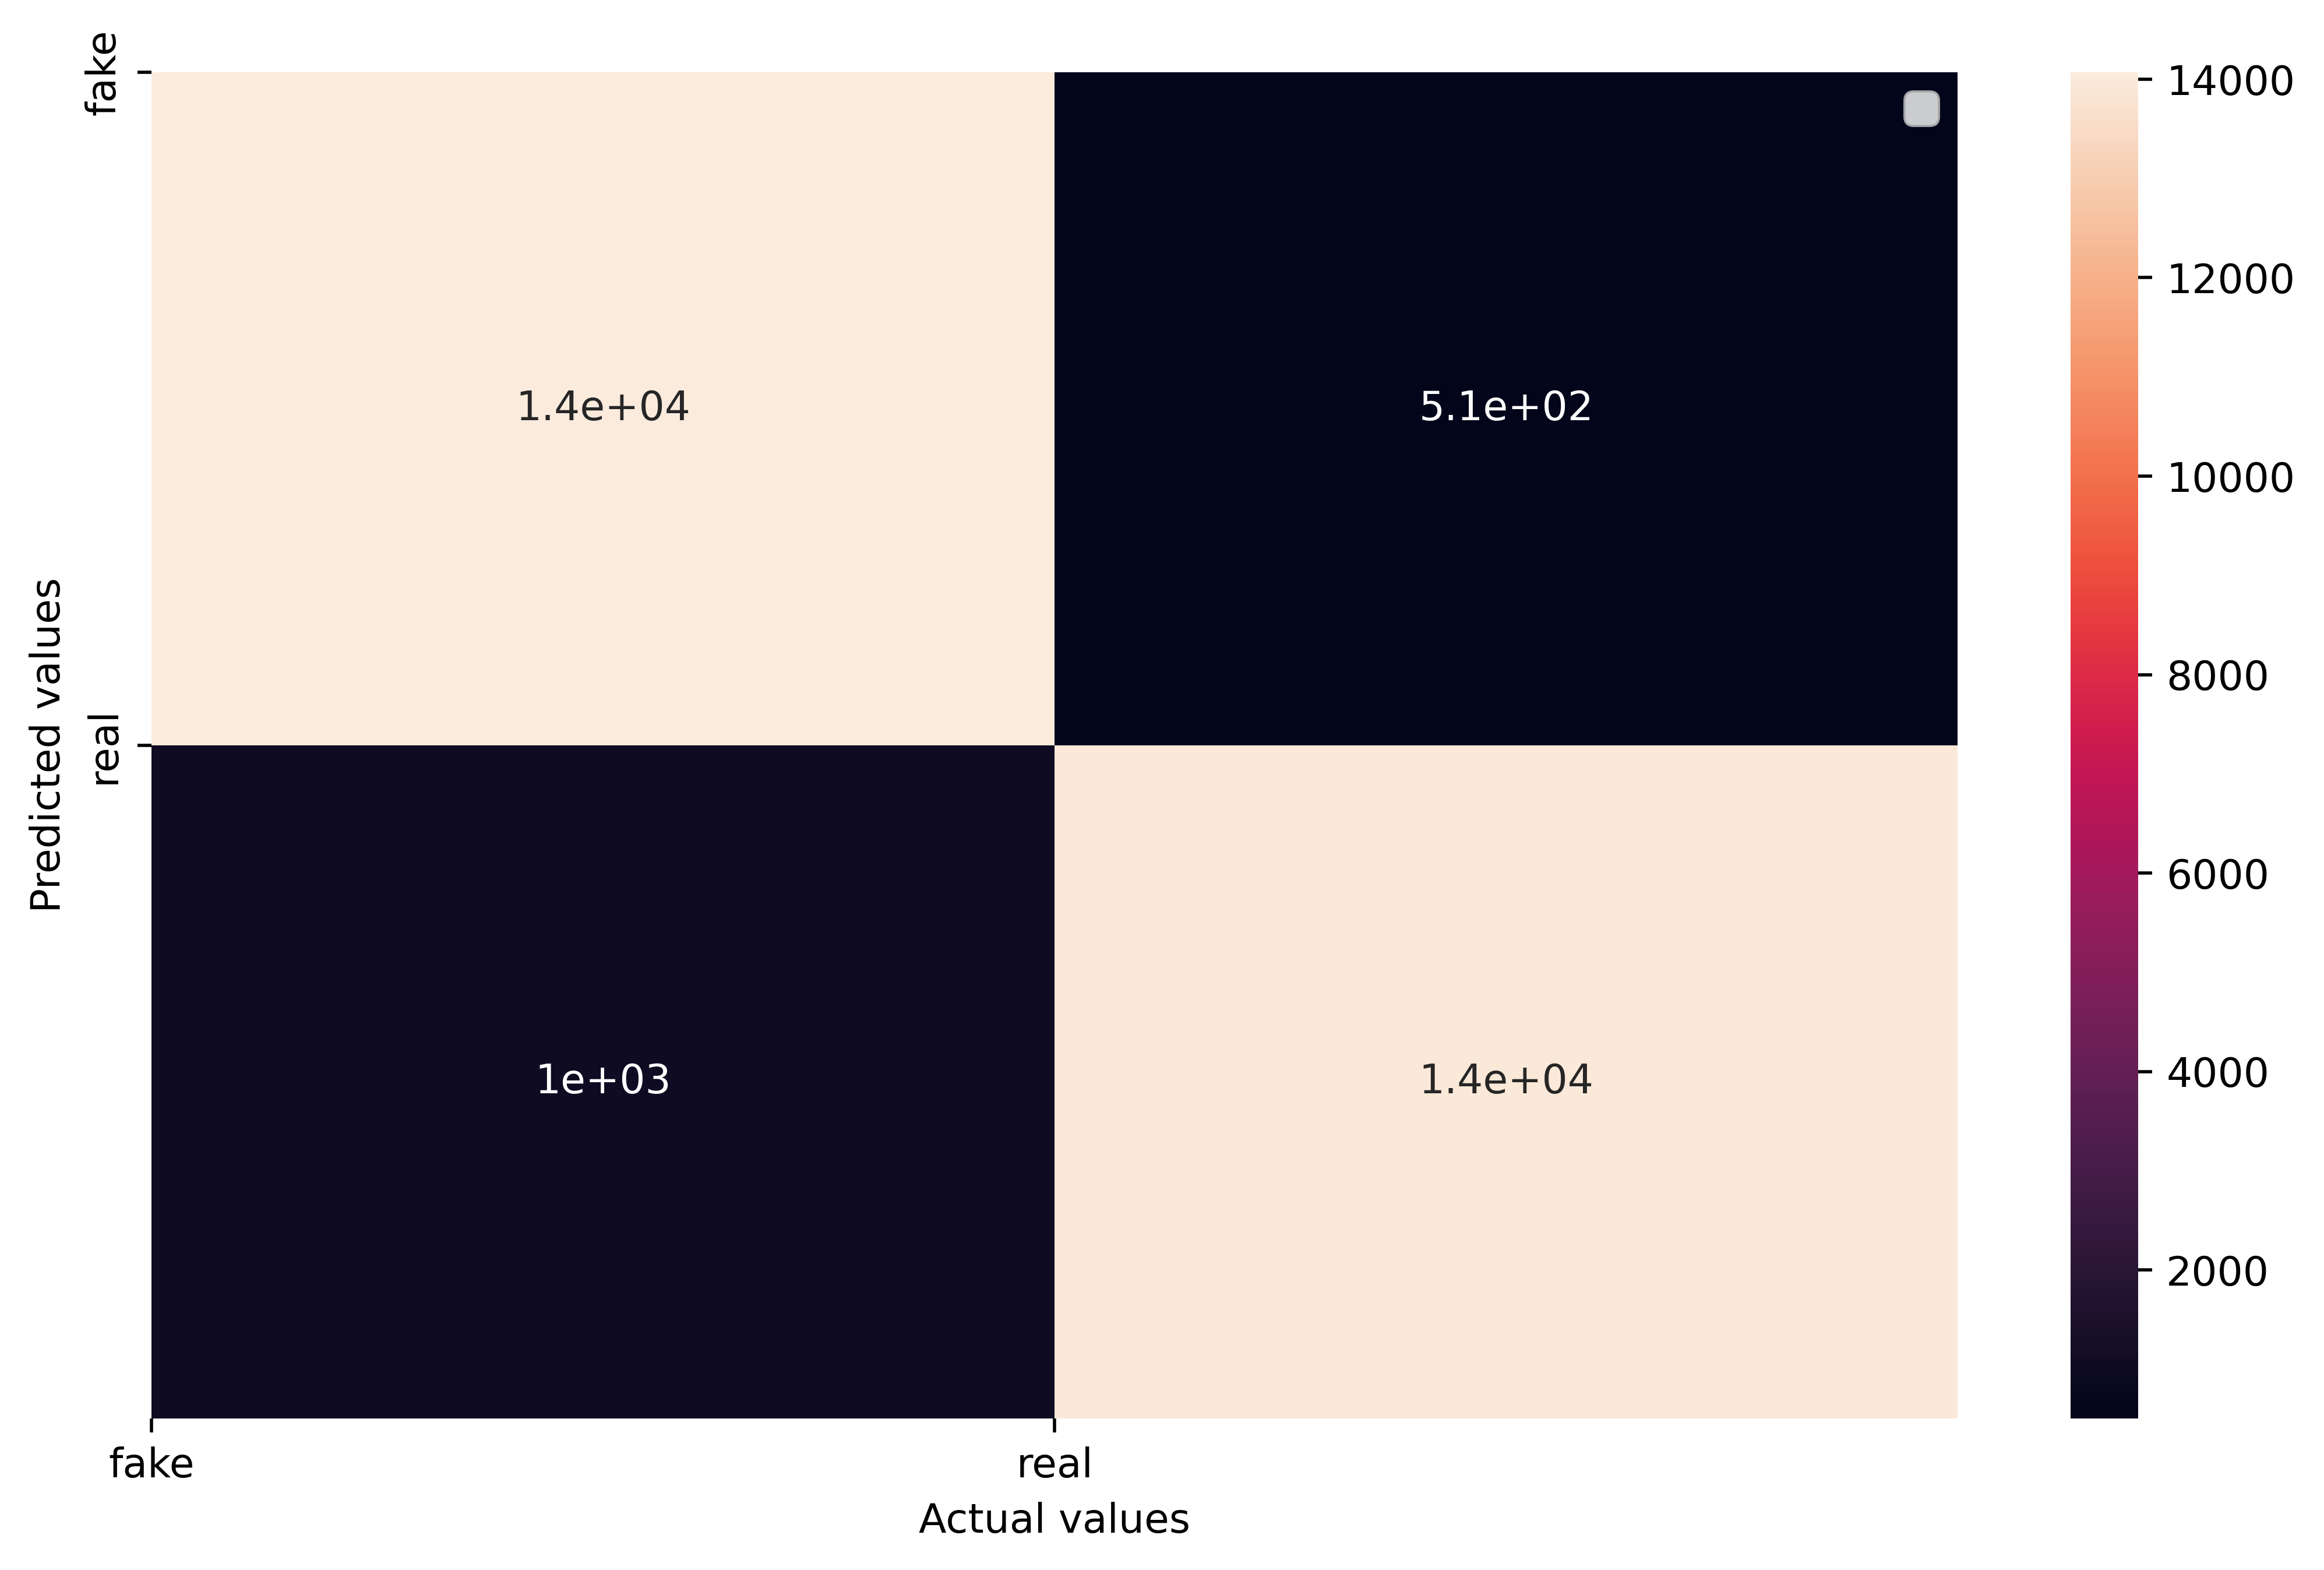

In [26]:
class_names = ['fake', 'real']
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm_dl, annot = True)
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, lstm_binary_predictions)
recall = recall_score(y_test, lstm_binary_predictions)
f1 = f1_score(y_test, lstm_binary_predictions)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.964934164934165
Recall: 0.9324939726761318
F1 Score: 0.9484367549894422


In [45]:
lstm_binary_predictions = lstm_binary_predictions.flatten()

In [46]:
y_pred_nb

array([0, 0, 0, ..., 1, 1, 1])

In [47]:
combined_predictions = (lstm_binary_predictions + y_pred_nb) >= 1

In [49]:
combined_predictions.astype(int)

array([0, 1, 0, ..., 1, 1, 1])

In [51]:
accuracy = accuracy_score(y_test, combined_predictions)
print(f"Accuracy of the combined model: {accuracy}")

Accuracy of the combined model: 0.9422229752626229


meta model

In [55]:
import numpy as np
combined_features = np.column_stack((y_pred_nb, lstm_predictions))

In [56]:
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression()
meta_model.fit(combined_features, y_test)

LogisticRegression()

In [62]:
_, x_test_after, _, y_test_after = train_test_split(x, y, random_state = 404, test_size = 0.6)

In [64]:
x_test_after

6305     Amid a presidential campaign marked by fears a...
60276    WASHINGTON Reuters The US Senate voted 55 to 4...
24700    UNIONDALE N Y Seeking to meet growing electric...
22316    NTEB Ads Privacy Policy PREPARE FOR 2018 Donal...
50716    BERLIN AFP Germanys government on Wednesday ap...
                               ...                        
7126     Keep your thanks what veterans really need are...
46442    How Do We Get to a Conversation in This Countr...
53309    President Trump spoke at the State Banquet dur...
51539    21st Century Wire says This week the historic ...
54240    Accidents are bound to happen when Democrats b...
Name: text, Length: 44265, dtype: object

In [65]:
x_test_after_cv = cv.transform(x_test_after)

In [66]:
x_test_after_token = tokenizer.texts_to_sequences(x_test_after)
x_test_after_token = pad_sequences(x_test_after_token, maxlen = 1000)

In [67]:
new_data_naive_bayes = mnb.predict(x_test_after_cv)
new_data_deep_learning = loaded_model.predict(x_test_after_token)
combined_new_data = np.column_stack((new_data_naive_bayes, new_data_deep_learning))

1384/1384 [==============================] - 837s 605ms/step


In [68]:
meta_model_predictions = meta_model.predict(combined_new_data)


In [69]:
accuracy = accuracy_score(y_test_after, meta_model_predictions)
print(f"Accuracy of the meta model: {accuracy}")

Accuracy of the meta model: 0.9602620580594149


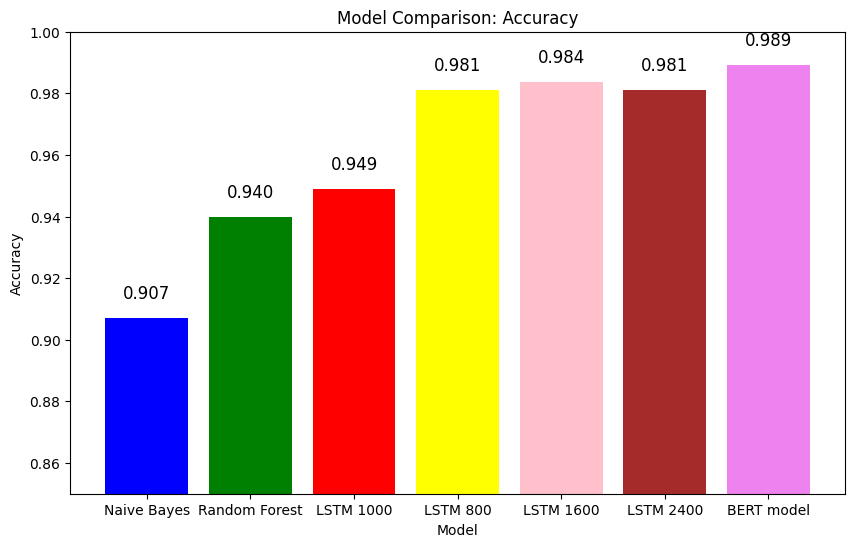

In [2]:
import matplotlib.pyplot as plt

# List of model names
models = ['Naive Bayes', 'Random Forest', 'LSTM 1000', 'LSTM 800', 'LSTM 1600', 'LSTM 2400', 'BERT model']

# Accuracy scores for each model
accuracy_scores = [0.907, 0.940, 0.949, 0.9812053853799584, 0.9838257883798681, 0.9811150266558236, 0.989247311827957]  # Replace with the actual accuracy values

# Create a bar chart to compare accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'yellow', 'pink', 'brown', 'violet'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0.85, 1.0)  # Adjust the y-axis limits if needed

# Show the accuracy values on top of each bar
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.005, f'{acc:.3f}', ha='center', va='bottom', fontsize=12)

plt.show()
